## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. Need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal 

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## High level steps

1. Understanding and Data prepration
2. Visualizing the Data
3. Building a linear model
4. Residual Analysis and model evaluation
5. Advance regression using Regularization
6. Residual Analysis and model evaluation


In [351]:
# importing libraries 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding and Data prepration

In [352]:
hd = pd.read_csv('train.csv')

In [353]:
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [354]:
hd.shape

(1460, 81)

In [355]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Looks like some columns have missing values, lets check in detail and decide next steps

In [356]:
# function to check missing values percentage in each column in dataframe 
def miss_val(df):
    for i in range(len(df.columns)):
        if hd[df.columns[i]].isnull().sum() > 0:
            print(df.columns[i],end=':')
            print(round(((df[df.columns[i]].isnull().sum()/len(df))*100),3))

In [357]:
miss_val(hd)

LotFrontage:17.74
Alley:93.767
MasVnrType:0.548
MasVnrArea:0.548
BsmtQual:2.534
BsmtCond:2.534
BsmtExposure:2.603
BsmtFinType1:2.534
BsmtFinType2:2.603
Electrical:0.068
FireplaceQu:47.26
GarageType:5.548
GarageYrBlt:5.548
GarageFinish:5.548
GarageQual:5.548
GarageCond:5.548
PoolQC:99.521
Fence:80.753
MiscFeature:96.301


##### In Data dicttionary for all these colum Null value means that facility is not available for the house.
Like if Pool is not there then there is no Pool quality same for fire place so adding all missing as NA text
Alley, FireplaceQu, PoolQC, Fence, MiscFeature, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageYrBlt, GarageQual, GarageCond, GarageFinish 

In [358]:
fl = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','BsmtQual','BsmtCond','BsmtExposure',
      'BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageQual','GarageCond','GarageFinish']
for i in fl:
    hd[i].fillna("NA", inplace = True)

In [359]:
# rechekcing missing values
miss_val(hd)

LotFrontage:17.74
MasVnrType:0.548
MasVnrArea:0.548
Electrical:0.068


### Will impute Numeric data with its Medain and Categoric data with Mode.

- LotFrontage and MasVnrArea are Numeric column 
- MasVnrType,Electrical are Categorical columns

In [360]:
hd['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [361]:
hd['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [362]:
hd['LotFrontage'].fillna(hd['LotFrontage'].median(), inplace=True)
hd['MasVnrArea'].fillna(hd['MasVnrArea'].median(), inplace=True)

In [363]:
hd['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [364]:
hd['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [365]:
miss_val_cat_columns = ['MasVnrType','Electrical']
for i in miss_val_cat_columns:
    hd[i].fillna(hd[i].mode()[0], inplace=True)

In [366]:
miss_val(hd)

In [367]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### All Missing values are taken care of now will go ahead with EDA

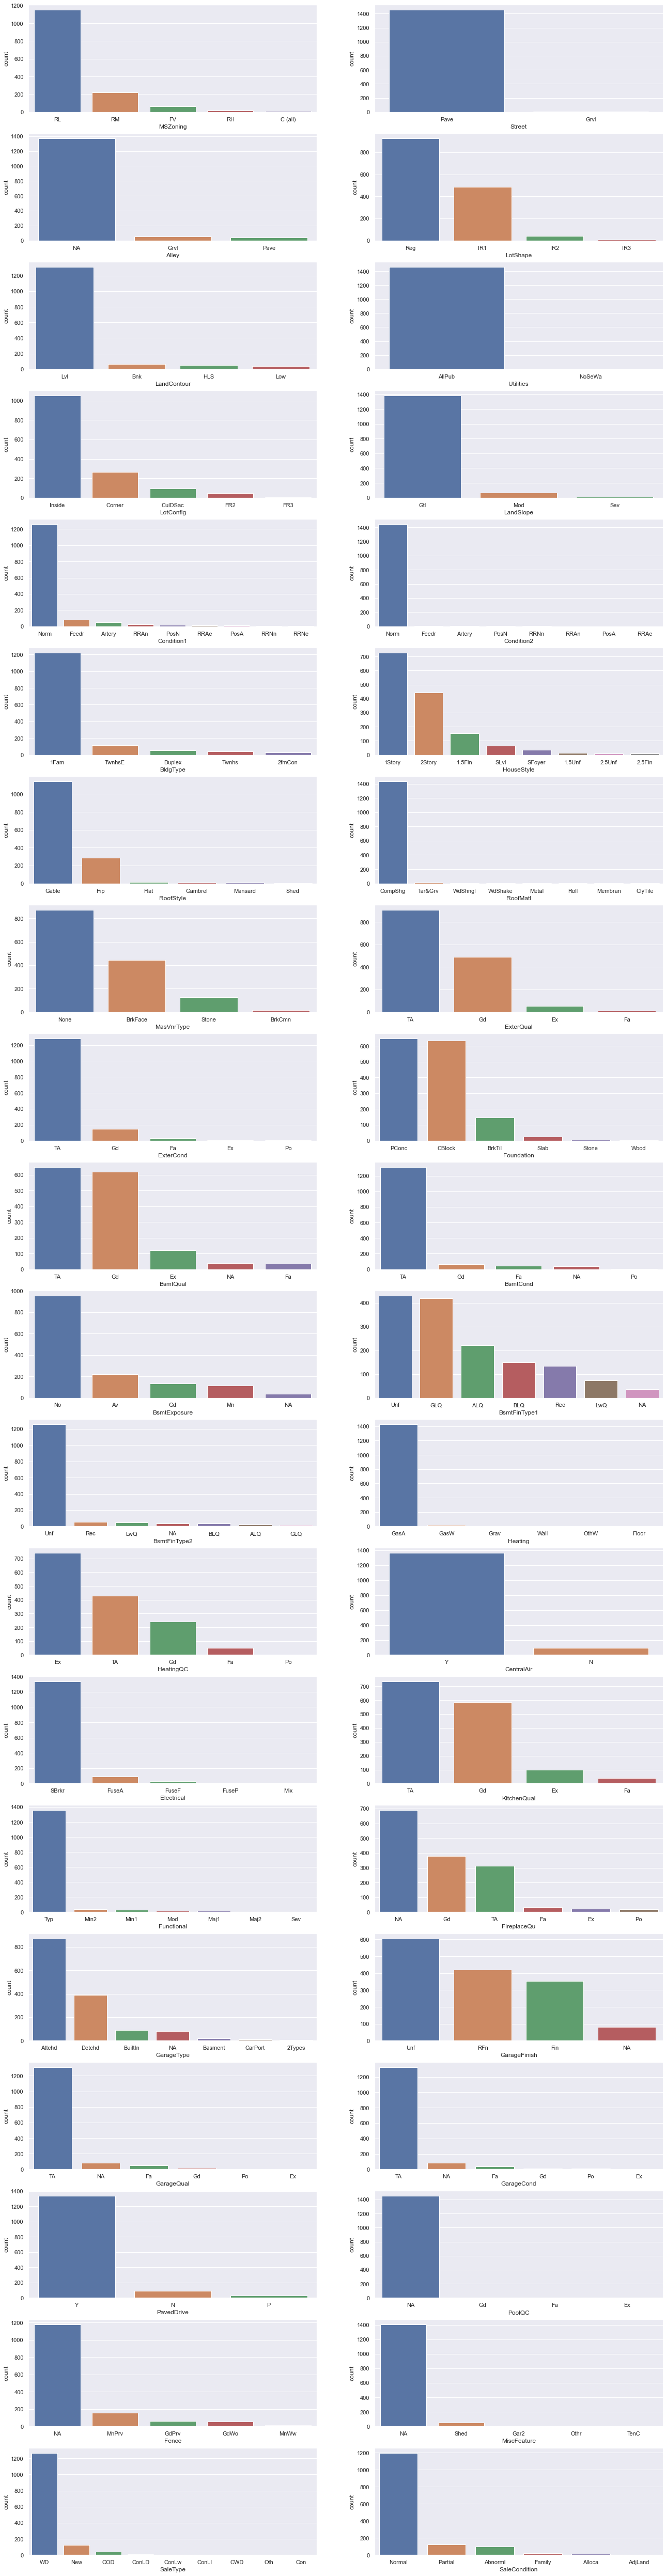

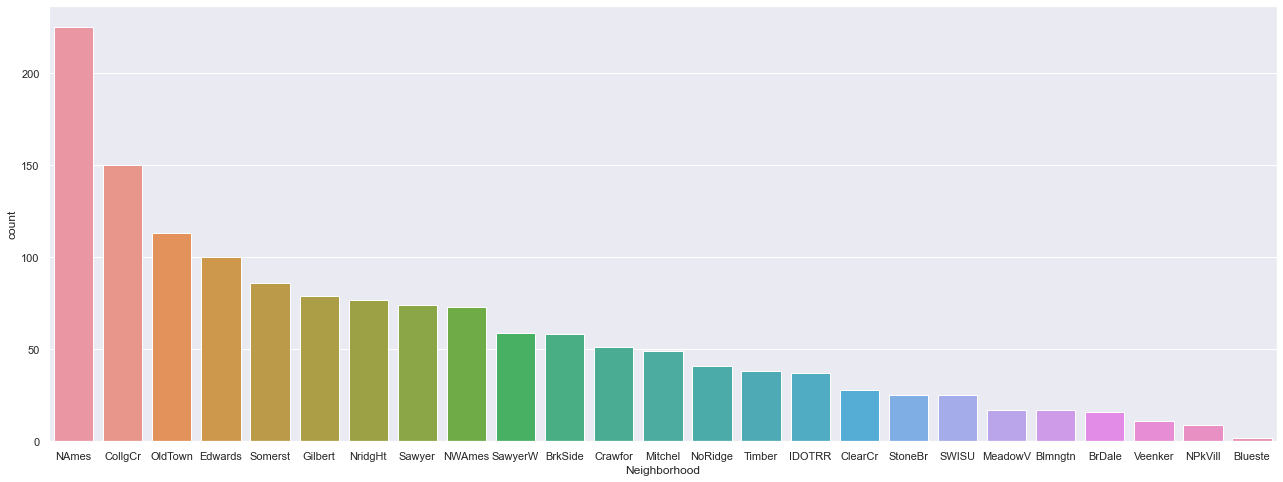

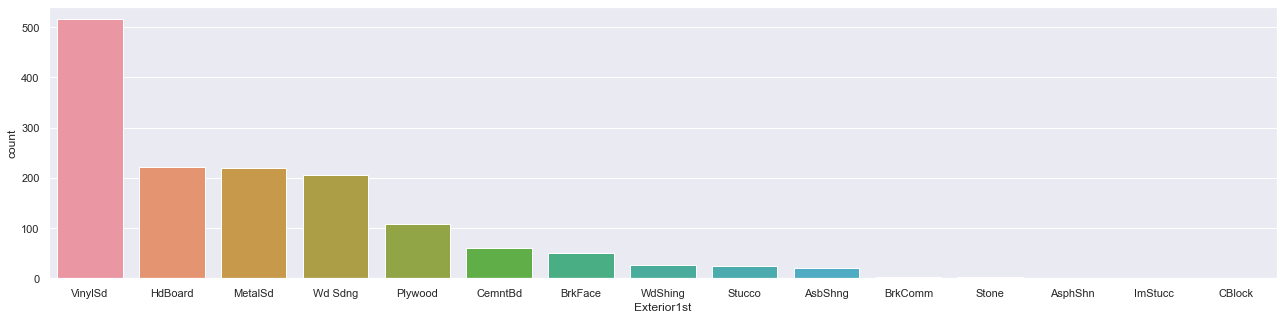

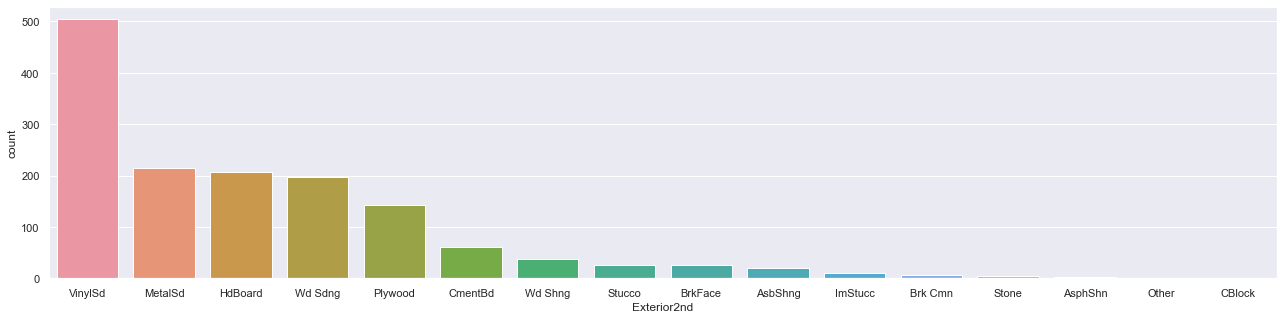

In [368]:
# Graph to show Categorical varibale distribution
j = 1  
plt.figure(figsize=(22,100))
sns.set(style='darkgrid')
for i in hd.select_dtypes(include=['object']):
    if i not in ('Neighborhood','Exterior1st','Exterior2nd','GarageYrBlt'):
        plt.subplot(22,2,j)
        sns.countplot(x=i, data=hd,
              order = hd[i].value_counts().index)
        j+=1
plt.figure(figsize=(22,8))
sns.countplot(x="Neighborhood", data=hd,
              order = hd['Neighborhood'].value_counts().index)
plt.figure(figsize=(22,5))
sns.countplot(x="Exterior1st", data=hd,
              order = hd['Exterior1st'].value_counts().index)
plt.figure(figsize=(22,5))
sns.countplot(x="Exterior2nd", data=hd,
              order = hd['Exterior2nd'].value_counts().index)
plt.show()

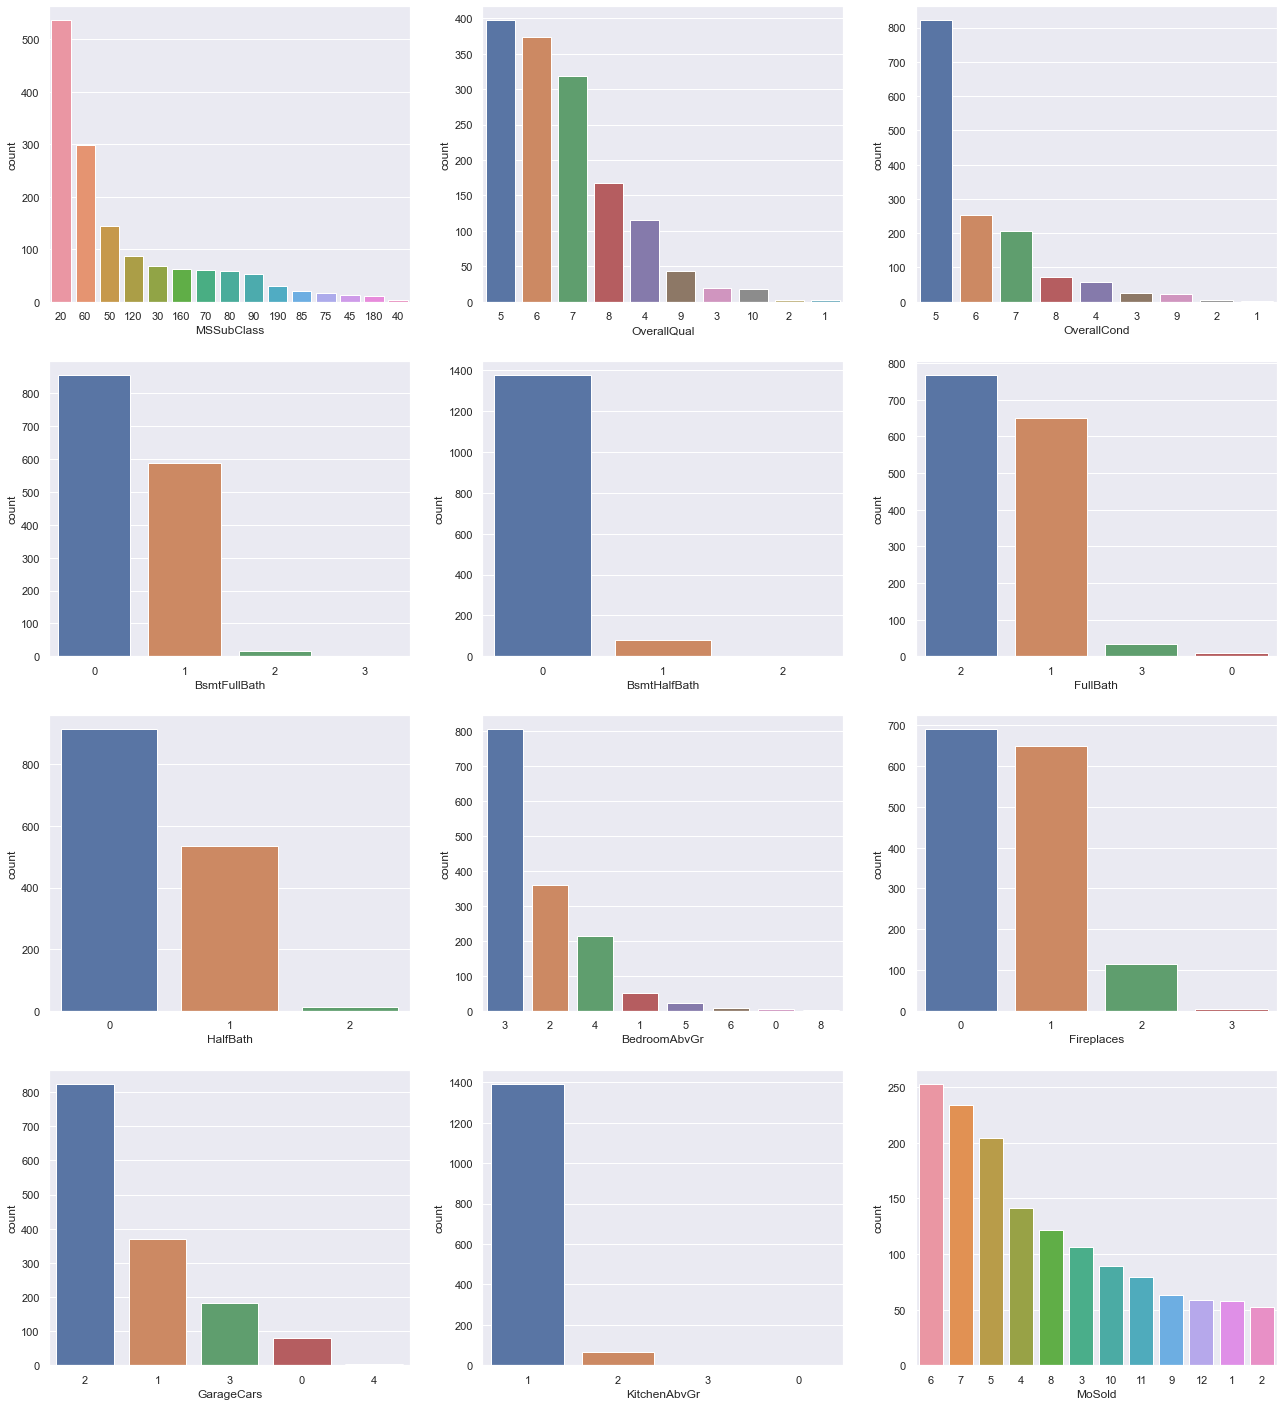

In [369]:
# Graph to show Categorical varibale distribution
ls = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath',
 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageCars','KitchenAbvGr','MoSold']
j = 1  
plt.figure(figsize=(22,25))
sns.set(style='darkgrid')
for i in ls:
    plt.subplot(4,3,j)
    sns.countplot(x=i, data=hd,
                  order = hd[i].value_counts().index)
    j+=1

plt.show()

#'YearBuilt','YearRemodAdd',

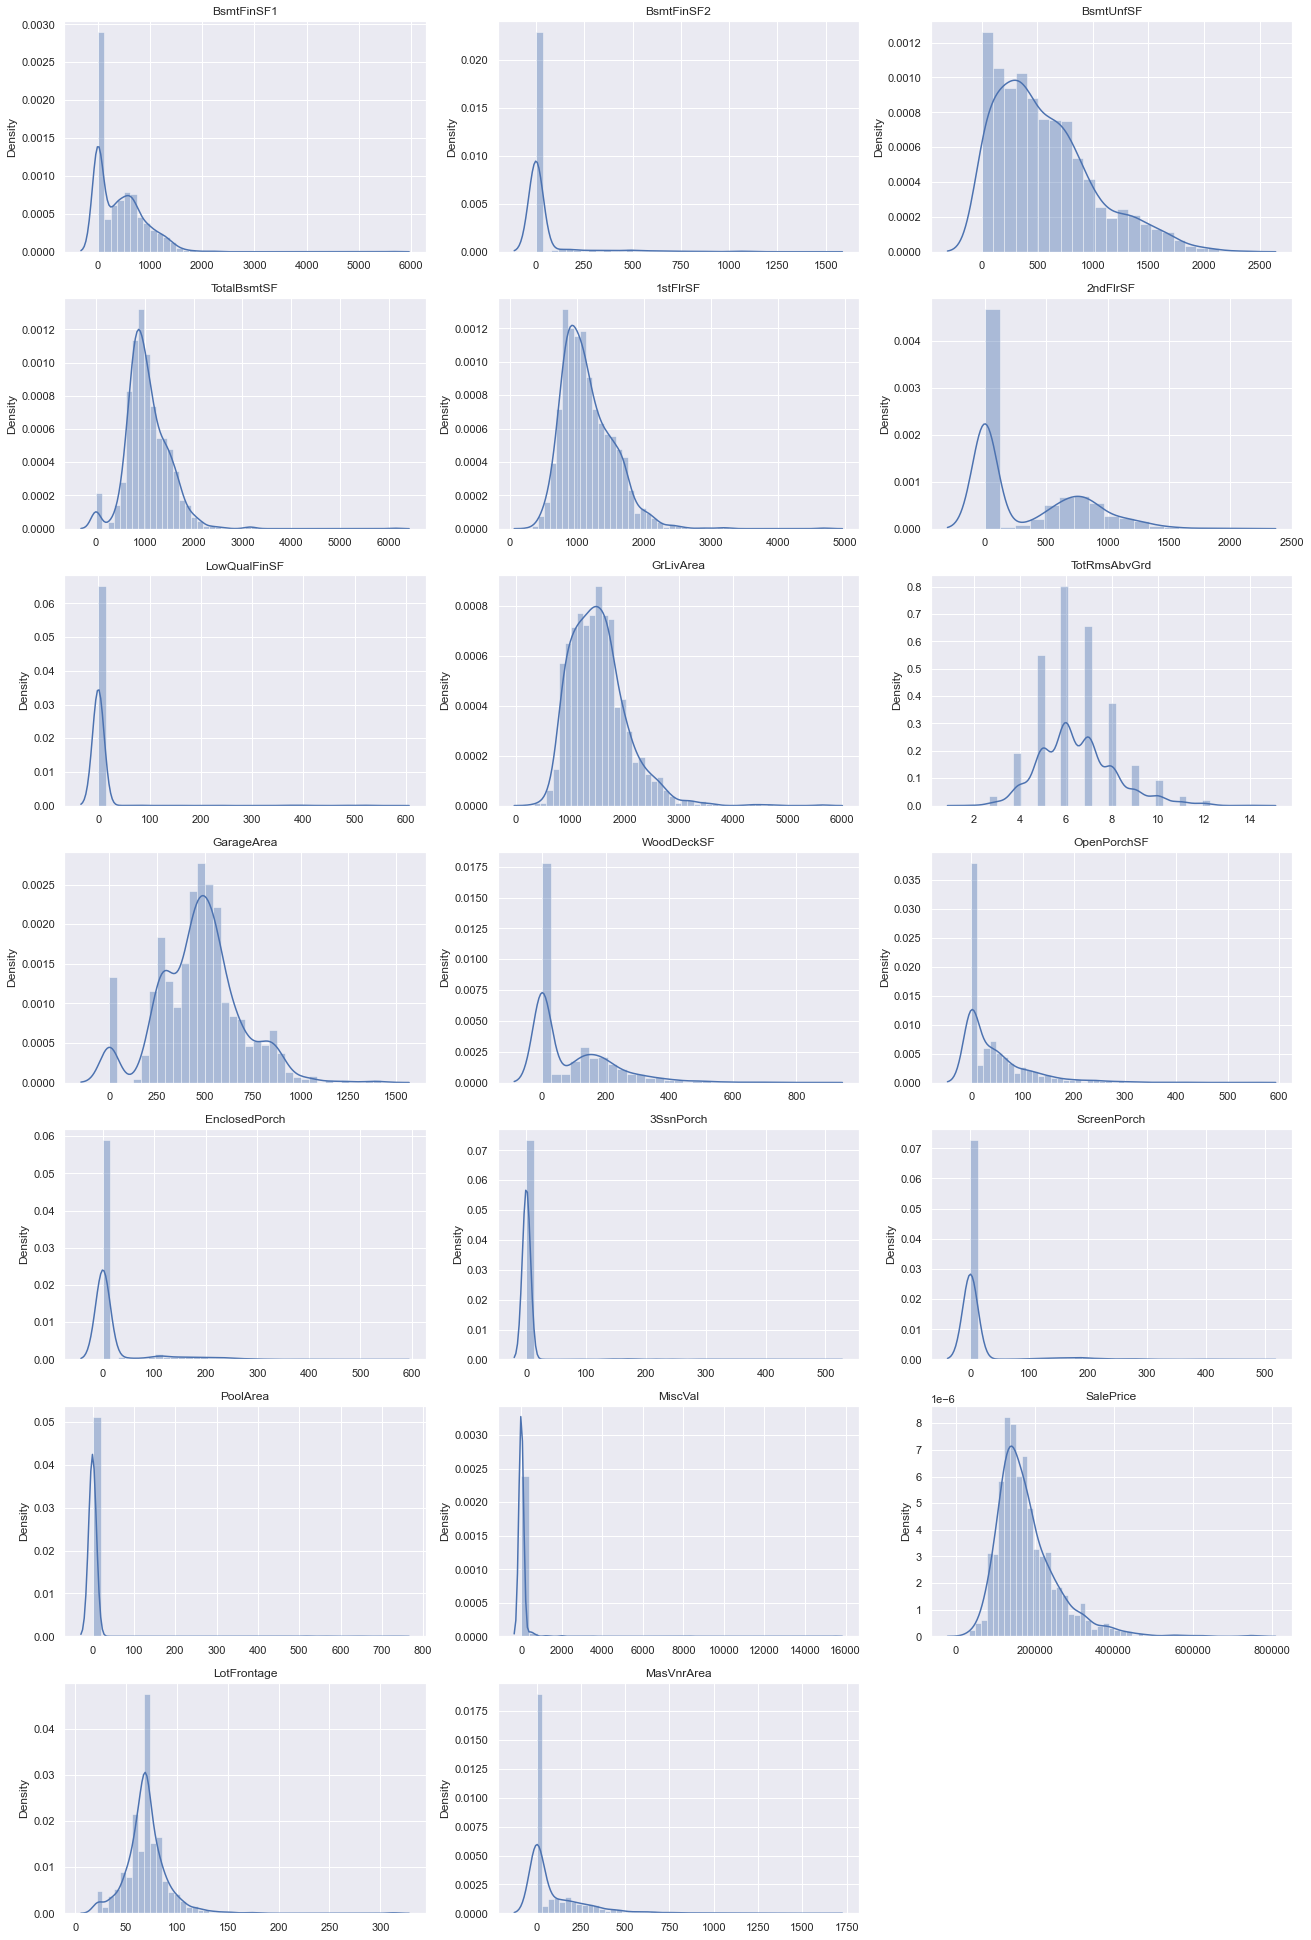

In [370]:
# Graph to show Countinous varibale distribution
ls2 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
 'TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
       'PoolArea','MiscVal','SalePrice','LotFrontage','MasVnrArea']

j = 1  
plt.figure(figsize=(22,45))
sns.set(style='darkgrid')
for i in ls2:
    plt.subplot(9,3,j)
    plt.title(i)
    sns.distplot(x=hd[i])
    j+=1

plt.show()

In [371]:
hd[ls2].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,LotFrontage,MasVnrArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,6.517808,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,69.863699,103.117123
std,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1.625393,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,22.027677,180.731373
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,21.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,60.000000,0.000000
50%,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,69.000000,0.000000
75%,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,79.000000,164.250000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,14.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,313.000000,1600.000000


In [372]:
hd['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Some of observation from univariate analysis

- MSSubClass : - Most of the houses sold are of 1-STORY 1946 & NEWER ALL STYLES / 2-STORY 1946 & NEWER, 1-1/2 STORY FINISHED ALL AGES, 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- MSZoning:- Most of the houses sold are form Residential Low Density Zone followed by Residential Medium Density.
- LotFrontage:-
- Street:- Almost all house sold are of street Paved 
- LotShape :- Sold houses are of Regular and Slightly irregular lot
- LandContour :- Almost all are of Near Flat/Level	Land Contour
- Utilities: All houses has All public Utilities (E,G,W,& S)
- LotConfig: Most of Lot configuration are   Inside lot or Corner and very few with other category
- Landslope: Almost all houses have gentle slope very less with severe slope.
- Condition1 and 2:- Highest number houses have normal category 
- BldgType: Most houses have Single-family Detached building type
- House Style: - half of the houses are 1 story, around 450 2 story and other category have less share
- Roof Style:- Most have Gable or hip roof type
- RoofMatl :- Almost all houses have Standard (Composite) Shingle.
- ExterQual and ExterCond : Half of the houses have Average/Typical quality of the material on the exterior followed by good and Excellent.
- Foundation: most houses have Poured Contrete and Cinder Block foundation.(600+600)
- BsmtQual: most houses have Average/Typical and Good basement height (700+600)
- BsmtCond: Almost all the base condition is Typical - slight dampness allowed
- BsmtExposure: one third houses doesn’t have or Average walkout or garden level walls
- BsmtFinType1: 450 Unfinshed , 400 good Living Quarters , 200 Average Living Quarters,150 Below Average Living Quarters
- BsmtFinType2: Alsmot all houses have Unfinshed second basement finished area 
- Almost all houses have Gas forced warm air furnace and heating quality as excellent or Average or good.
- Almost all house have Central air conditioning
- Almost all houses have Standard Circuit Breakers & Romex Electrical system.
- Almost all houses have Typical/Average or good Kitchen quality
- Almost all house have Typical Functionality
- More than half have attached garage , around 400 have detached ,rest category have less share
- 700 unfinished interior garage , 400 Rough finished and 300 Fineshed.
- Almost all have Typical/Average garage quality and condition
- Almost all have Paved or partial paved driveway.
- Almost all have Warranty Deed – Conventional saletype and normal sale Condition.
- 300 # of house from North Ames  Neighborhood ,150 from College Creek ,100 each from Old Town and Edwards rest Neighborhood have number ranging from 75 to 10. Bluestem have lowest 
- Overall quality and condition is mostly average or above average and good
- Most houses don’t have Basement half bath, 600 have one basement bath very few have 2.
- Above grade bathroom are either 2 (750) or 1 (650)
- Half baths above grade 850 no half bath 500 one half bath
- Bedrooms above grade 800 houses have 3 bedrooms 450 have 2 , 200 have 4 bedrooms
- Half of the houses doesn’t have firplace of them mostly have 1
- Half of the houses have garage which can park 2 cars 400 have space to park 1 car
- 2009 and 2007 have heighst house sales and 2010 have lowest
- House sales have peak in May,Jun,Jul and low on Dec,Jan,Feb
- Most of the houses built in year 1950 to 1975 or post 2000
- Total square feet of basement area 1057 Mean and 991 median there are outliers with max value 6110
- First Floor square feet Mean 1162 and median 1087 with outlier of 4692.
- Salesprice Mean price 180912 dollars and Median is 163000 dollars with outlier(max) value 755000.

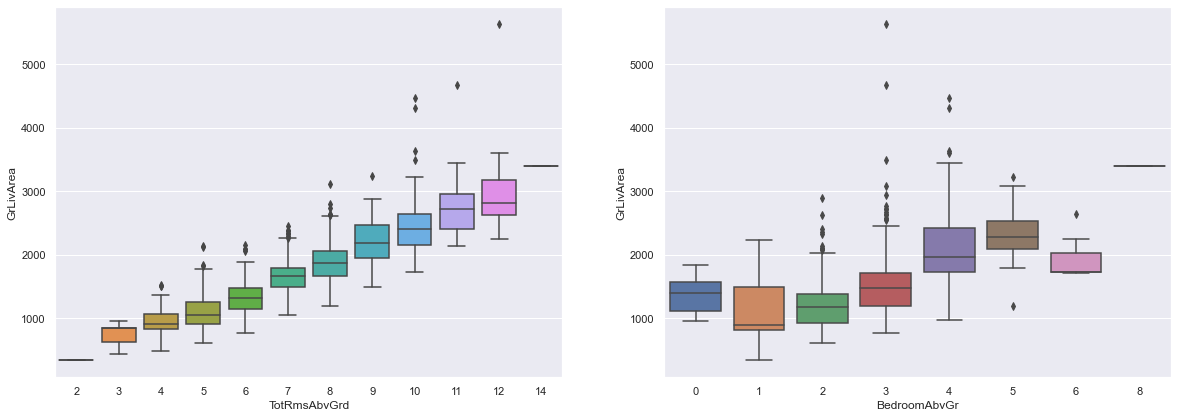

In [373]:
#graph showing TotRmsAbvGrd/BedroomAbvGr and GrLivArea are related, as # of rooms goes up GrLivArea  goes up
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(x='TotRmsAbvGrd',y='GrLivArea',data=hd)
plt.subplot(2,2,2)
sns.boxplot(x='BedroomAbvGr',y='GrLivArea',data=hd)
plt.show()

In [374]:
## This shows 1stFlr + SF2ndFlrSF gives GrLivArea column and its relation
print('1stFlr + SF2ndFlrSF total :', (hd['1stFlrSF']+hd['2ndFlrSF']).sum())
print('GrLivArea total :' , hd['GrLivArea'].sum())

1stFlr + SF2ndFlrSF total : 2204044
GrLivArea total : 2212577


### After doing data analysis and reading data dictonory decided to remove these column as it will not help in model building. Reason for each is stated below

- Id : just index column can be removed 
- Street:- 99% houses sold has street Paved 
- alley :- 90%+ houses sold has No alley access 
- Utilities: All houses except one has All public Utilities (E,G,W,& S) 
- LandSlope: Almost all 95% houses have gentle slope very less with severe slope.
- Condition2:- 98% have Nomral catehory
- RoofMatl :- Almost all 98 % houses have Standard (Composite) Shingle.
- ExterQual:- Most of the valuea are TA means noraml this column gives almost same information as ExterCond
- BsmtCond: Almost all the base condition is Typical - slight dampness allowed
- BsmtFinType2: Alsmot all 85% houses have Unfinshed second basement finished area 
- BsmtFinSF2 - As Alsmot all 85% houses have Unfinshed second basement finished area 
- heating:- Almost all houses have Gas forced warm air furnace and heating quality as excellent or Average or good.
- CentralAir :- Almost all house have Central air conditioning
- Electrical : Almost all houses have Standard Circuit Breakers & Romex Electrical system.
- Functional : Almost all house have Typical Functionality
- GarageQual Almost all have Typical/Average garage quality
- GarageCond Almost all have Typical/Average garage condition
- PavedDrive Almost all have Paved or partial paved driveway.
- PoolArea: only 7 houese have pool so this column will not help 
- PoolQC : Related column to poolare as pool is not available for most houses this column not required
- PoolArea only 7 houese have pool so this column will not help 
- Fence Facning is not avaiable for 80 % houese
- MiscFeature: Almost all houses deosnt have any Miscellaneous feature
- SaleType: Almost all have Warranty Deed – Conventional saletype and normal sale Condition.
- Neighborhood : Since Its  Ames city (USA) Neighborhood data it will not help in predicting house values in Australian market 
- Exterior2nd : since it has almost same values as Exterior1st can drop this  
- GarageYrBlt : it will not help that much as we haev considered other columns related to garage
- OverallCond: It contains same information as OverallQual
- BsmtHalfBath : Most of the houses dont have BsmtHalfBath
- FireplaceQu: 690 houses dont have firplace also this is related to firplace column
- GarageCars this gives same information as garage total sq
- BsmtUnfSF Unfinished square feet of basement area will not impact house prices
- 1stFlrSF total of 1stFlrSF and 2ndFlrSF is equal to GrLivArea so its repeatative information
- 2ndFlrSF total of 1stFlrSF and 2ndFlrSF is equal to GrLivArea so its repeatative information
- LowQualFinSF most of the times its 0 
- KitchenAbvGr almost all houses have 1 kicthen
- TotRmsAbvGrd in relation to GrLivArea linear realted to GrLivArea
- 3SsnPorch almost all 0 values
- ScreenPorch most 0 values
- EnclosedPorch most 0 values
- MiscVal most 0 values
- MasVnrType :- MasVnrArea is include instead of this
- YearRemodAdd Remodel date (same as construction date if no remodeling or additions) not much useful as there could be no remodel and it will be same as YearBuilt


In [375]:
# droping unwanted columns
drop_lm_ls = ['Id','Alley','Street','Utilities','LandSlope','Condition2','RoofMatl','ExterQual','BsmtCond','BsmtFinType2',
'BsmtFinSF2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive',
'PoolArea','PoolQC','Fence','MiscFeature','SaleType','Neighborhood','Exterior2nd','GarageYrBlt','OverallCond',
'BsmtHalfBath','FireplaceQu','GarageCars','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','KitchenAbvGr',
'TotRmsAbvGrd','3SsnPorch','ScreenPorch','EnclosedPorch','MiscVal','MasVnrType','YearRemodAdd','BedroomAbvGr']
hd = hd.drop(drop_lm_ls , axis = 1)
len(hd.columns)

38

### Data trasforamtion
##### As Many categorical column have lot of categories this will create issue when we create dummy variable , # number of dummy variables will be very high so wil recategorise column as per univariate analysis one by one

In [376]:
#MSZoning very high number of houses are of Residential Low Density and other categories 
#         have very low share we can mix rest of the values into one bucket other 
hd['MSZoning'] = hd['MSZoning'].apply(lambda x : 'Others' if x != 'RL' else x )
hd['MSZoning'].value_counts()

RL        1151
Others     309
Name: MSZoning, dtype: int64

In [377]:
# LotShape :- More than Half of houses have Regular lot shape 484 have Slightly irregular , 
#             very less with Moderately Irregular and Irregular we can buket 3 category into irregular
hd['LotShape'] = hd['LotShape'].apply(lambda x : 'Irreg' if x != 'Reg' else x )
hd['LotShape'].value_counts()

Reg      925
Irreg    535
Name: LotShape, dtype: int64

In [378]:
#LandContour Almost all are of Near Flat/Level	Land Contour other catehories have very less data 
#            we can club those into one called other
hd['LandContour'] = hd['LandContour'].apply(lambda x : 'Others' if x != 'Lvl' else x )
hd['LandContour'].value_counts()

Lvl       1311
Others     149
Name: LandContour, dtype: int64

In [379]:
#LotConfig: 70% Lot configuration are Inside lot rest category contains 30 share we can club them into 1 as others
hd['LotConfig'] = hd['LotConfig'].apply(lambda x : 'Others' if x != 'Inside' else x )
hd['LotConfig'].value_counts()

Inside    1052
Others     408
Name: LotConfig, dtype: int64

In [380]:
#Condition1 Highest number houses have normal category we can club rest into others
hd['Condition1'] = hd['Condition1'].apply(lambda x : 'Others' if x != 'Norm' else x )
hd['Condition1'].value_counts()

Norm      1260
Others     200
Name: Condition1, dtype: int64

In [381]:
# BldgType: Most houses have Single-family Detached building type we can club township group into one
hd['BldgType'] = hd['BldgType'].apply(lambda x : 'Twnhs' if x in ('TwnhsE','Twnhs') else x )
hd['BldgType'].value_counts()

1Fam      1220
Twnhs      157
Duplex      52
2fmCon      31
Name: BldgType, dtype: int64

In [382]:
#House Style: - half of the houses are 1 story, around 450 2 story and other category have less share we can club them together
hd['HouseStyle'] =hd['HouseStyle'].apply(lambda x : 'Others' if x not in ('1Story','2Story') else x )
hd['HouseStyle'].value_counts()

1Story    726
2Story    445
Others    289
Name: HouseStyle, dtype: int64

In [383]:
# Roof Style:- Most have Gable or hip roof type we can club rest as others
hd['RoofStyle'] =hd['RoofStyle'].apply(lambda x : 'Others' if x not in ('Gable') else x )
hd['RoofStyle'].value_counts()

Gable     1141
Others     319
Name: RoofStyle, dtype: int64

In [384]:
# ExterCond :- 60 % have normal condition rest have good and other conditions we can club other categories together
hd['ExterCond'] = hd['ExterCond'].map({'TA' : 'TA' , 'Gd': 'Gd' , 'Fa': 'TA' , 'Ex': 'Gd' , 'Po' : 'TA'})
hd['ExterCond'].value_counts()

TA    1311
Gd     149
Name: ExterCond, dtype: int64

In [385]:
# Foundation: most houses have Poured Contrete and Cinder Block foundation.(600+600) rest can be clubed as others
hd['Foundation'] =hd['Foundation'].apply(lambda x : 'Others' if x not in ('PConc','CBlock') else x )
hd['Foundation'].value_counts()

PConc     647
CBlock    634
Others    179
Name: Foundation, dtype: int64

In [386]:
# BsmtExposure: one third houses doesn’t have or  have Average walkout or garden level walls , we can club NA to NO and rest into average
hd['BsmtExposure'] = hd['BsmtExposure'].map({'No' : 'No' , 'Gd': 'Avg' , 'Av': 'Avg' , 'Mn': 'Avg' , 'NA' : 'No'})
hd['BsmtExposure'].value_counts()


No     991
Avg    469
Name: BsmtExposure, dtype: int64

In [387]:
# - BsmtFinType1: 450 Unfinshed , 400 good Living Quarters , 200 Average Living Quarters,150 Below Average Living Quarters
#    can club Na into Unfinshed and Alq and BLQ and rest into others
hd['BsmtFinType1'] = hd['BsmtFinType1'].map({'Rec' : 'Other' , 'LwQ': 'Other' ,
                                             'ALQ': 'Other' ,'Unf' : 'Unf' , 'GLQ': 'GLQ' ,'BLQ': 'Other' , 'NA' : 'Unf'})
hd['BsmtFinType1'].value_counts()

Other    575
Unf      467
GLQ      418
Name: BsmtFinType1, dtype: int64

In [388]:
# HeatingQC : - Half of the house have excellen heating quality follwed by Ave and Good we can club rest into Average
hd['HeatingQC'] = hd['HeatingQC'].map({'Ex' : 'Ex' , 'TA': 'Avg' , 'Gd': 'Ex' , 'Fa': 'Avg' , 'Po' : 'Avg'})
hd['HeatingQC'].value_counts()

Ex     982
Avg    478
Name: HeatingQC, dtype: int64

In [389]:
# GarageType: can club Attched NA and other
hd['GarageType'] =hd['GarageType'].apply(lambda x : 'Others' if x not in ('Attchd') else x )
hd['GarageType'].value_counts()

Attchd    870
Others    590
Name: GarageType, dtype: int64

In [390]:
# GarageFinish:  Can club Finsh and Roughly finished into Finish and Na into Unf
hd['GarageFinish'] = hd['GarageFinish'].map({'Unf' : 'Unf' , 'RFn': 'RFn' , 'Fin': 'Fin' , 'NA': 'Unf' })
hd['GarageFinish'].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [391]:
# Exterior1st :- Can keep values having count more than 200 and club rest into other
hd['Exterior1st'] =hd['Exterior1st'].apply(lambda x : 'Others' if x not in ('VinylSd','HdBoard','MetalSd','Wd Sdng') else x )
hd['Exterior1st'].value_counts()

VinylSd    515
Others     297
HdBoard    222
MetalSd    220
Wd Sdng    206
Name: Exterior1st, dtype: int64

In [392]:
# MSSubClass :- Keep 20/60/50 and club rest into other
hd['MSSubClass'] =hd['MSSubClass'].apply(lambda x : 'Others' if x not in (20,60,50) else x )
hd['MSSubClass'].value_counts()

20        536
Others    481
60        299
50        144
Name: MSSubClass, dtype: int64

OverallQual can club Very Excellent,Excellent,Very Good,Good into good rest into average

- Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [393]:
hd['OverallQual'] =hd['OverallQual'].apply(lambda x : 'Good' if x > 6 else 'Avg')
hd['OverallQual'].value_counts()

Avg     912
Good    548
Name: OverallQual, dtype: int64

In [394]:
#BsmtFullBath : can divide data into Yes and No 1/0
hd['BsmtFullBath'] =hd['BsmtFullBath'].apply(lambda x : 1 if x > 0 else x)
hd['BsmtFullBath'].value_counts()

0    856
1    604
Name: BsmtFullBath, dtype: int64

In [395]:
# FullBath : Since only 9 houses have no full batch we can club into 1 and other into 2
hd['FullBath'] =hd['FullBath'].apply(lambda x : 1 if x < 2 else 2)
hd['FullBath'].value_counts()

2    801
1    659
Name: FullBath, dtype: int64

In [396]:
# HalfBath :  Can club into yes/no 1/0
hd['HalfBath'] =hd['HalfBath'].apply(lambda x : 1 if x > 0 else x)
hd['HalfBath'].value_counts()

0    913
1    547
Name: HalfBath, dtype: int64

In [397]:
# Fireplaces :- half of them have no firepalce and rest have one or more we cn club as yes or no 1/0
hd['Fireplaces'] =hd['Fireplaces'].apply(lambda x : 1 if x > 0 else x)
hd['Fireplaces'].value_counts()

1    770
0    690
Name: Fireplaces, dtype: int64

In [398]:
# SaleCondition :- club less count category into other 
hd['SaleCondition'] =hd['SaleCondition'].apply(lambda x : 'Others' if x in ('Family','Alloca','AdjLand') else x )
hd['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Others       36
Name: SaleCondition, dtype: int64

In [399]:
# Will create new column House age by substrating YrSold to YearBuilt 
hd['Age']  = hd['YrSold'] - hd['YearBuilt']
hd['Age'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64

In [400]:
# will drop YrSold and YearBuilt 
hd = hd.drop(['YrSold','YearBuilt'] , axis = 1)
len(hd.columns)

37

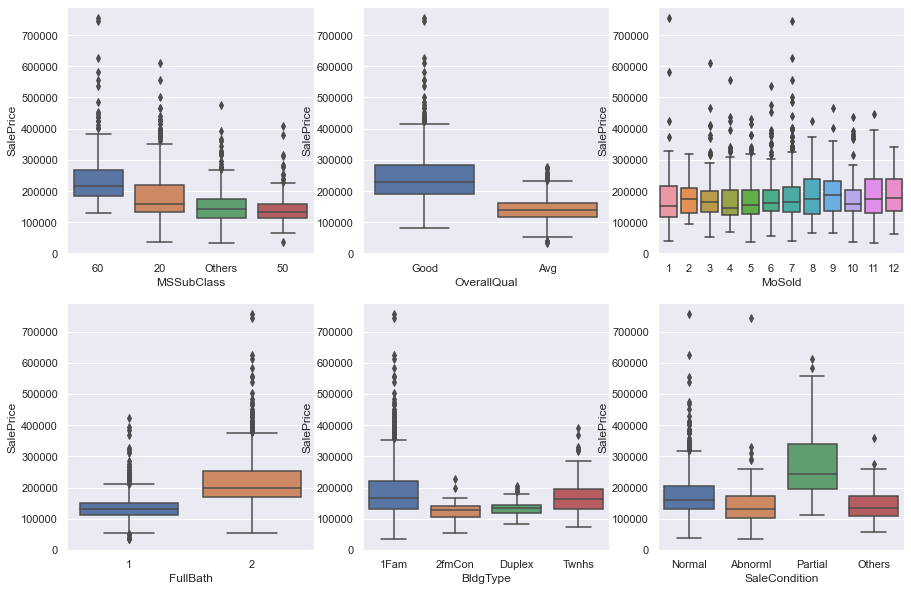

In [401]:
# Plot to check relation between some inporatnt Categorical variable and Sales price
plt.figure(figsize=(15,10))
plt.yscale('log')
plt.subplot(2,3,1)
sns.boxplot(x='MSSubClass',y='SalePrice',data=hd)
plt.subplot(2,3,2)
sns.boxplot(x='OverallQual',y='SalePrice',data=hd)
plt.subplot(2,3,3)
sns.boxplot(x='MoSold',y='SalePrice',data=hd)
plt.subplot(2,3,4)
sns.boxplot(x='FullBath',y='SalePrice',data=hd)
plt.subplot(2,3,5)
sns.boxplot(x='BldgType',y='SalePrice',data=hd)
plt.subplot(2,3,6)
sns.boxplot(x='SaleCondition',y='SalePrice',data=hd)
plt.show()

In [402]:
Num_col = ['LotFrontage','LotArea','OverallQual','MasVnrArea','BsmtFinSF1','TotalBsmtSF','GrLivArea',
           'Age','FullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','SalePrice']
cor = hd[Num_col].corr()

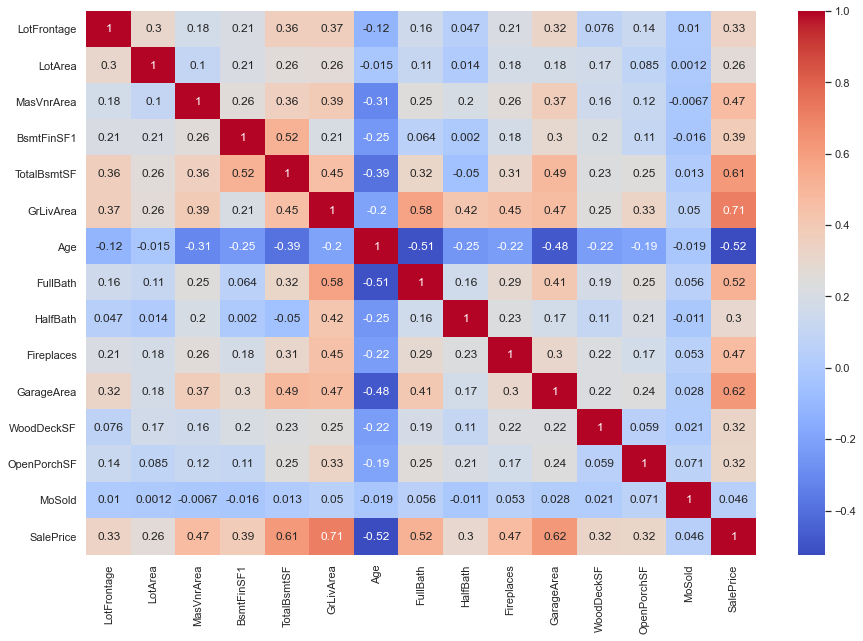

In [403]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

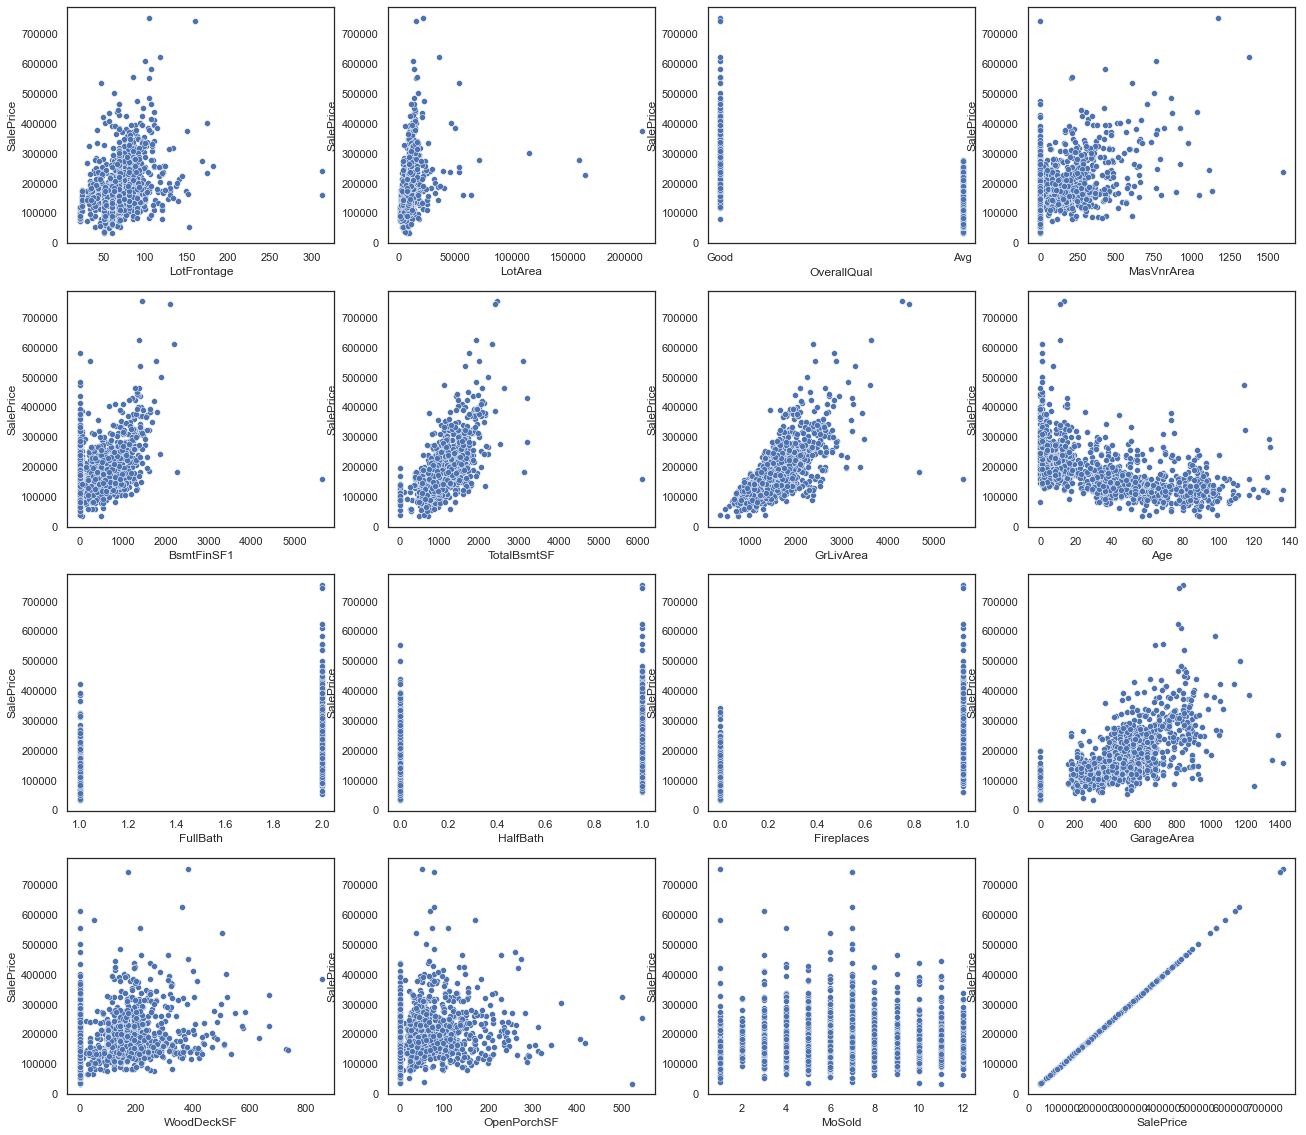

In [404]:
# Graph to show relation between countinous varibale and target variable(Sales Price)

j = 1  
plt.figure(figsize=(22,20))
sns.set_style("white")
for i in Num_col:
    plt.subplot(4,4,j)
    sns.scatterplot(x=i,y='SalePrice',data=hd)
    j+=1
plt.show()

## Bivariate analysis

- 2-STORY 1946 & NEWER type of houses feteches more money follwed by 1-STORY PUD (Planned Unit Development) - 1946 & 1-STORY 1946 & NEWER ALL STYLES
- Overall quality of house imapcts prices
- Floating Village Residential zone has high average values followed by Residential Low Density
- Full bathrooms as # of baths increase prices also increase.
- For bedrooms also has # of bedriooms goes up prices goes up until bedroom number 4 , from 4 bedroom 
- Same goes for Garage capacity , more garage capacity house price increase
- There is high positive correraltion between sales price and Grlivarea,totalbssqft,garagearea negatively related to age of house.
- some of the prector variables have correraltion,mainly all the area realted columns

In [405]:
hd.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Condition1,BldgType,HouseStyle,...,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,SalePrice,Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Norm,1Fam,2Story,...,0,Attchd,RFn,548,0,61,2,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,Others,Others,1Fam,1Story,...,1,Attchd,RFn,460,298,0,5,Normal,181500,31
2,60,RL,68.0,11250,Irreg,Lvl,Inside,Norm,1Fam,2Story,...,1,Attchd,RFn,608,0,42,9,Normal,223500,7
3,Others,RL,60.0,9550,Irreg,Lvl,Others,Norm,1Fam,2Story,...,1,Others,Unf,642,0,35,2,Abnorml,140000,91
4,60,RL,84.0,14260,Irreg,Lvl,Others,Norm,1Fam,2Story,...,1,Attchd,RFn,836,192,84,12,Normal,250000,8


With this EDA is done. Now dataset is ready to for modeling.

## Model Building
### Data Prepration
- Creating Dummy Variables
- Test train split
- scalling 

In [406]:
# Spliting into X and y
y = hd.pop('SalePrice')
X = hd

In [407]:
# converting some integar var to categorical so it will be converted to dummy
int_cat = ['BsmtFullBath','FullBath','HalfBath','Fireplaces','MoSold']
for i in int_cat:
    X[i] = X[i].astype('object')

In [408]:
#seprating categorical variables to create dummy variables
categorical_hd = X.select_dtypes(include=['object'])
len(categorical_hd.columns)

26

In [409]:
#creating dummy variable
hd_dummies = pd.get_dummies(categorical_hd, drop_first=True)
len(hd_dummies.columns)

54

In [410]:
hd_dummies.head()

,MSSubClass_50,MSSubClass_60,MSSubClass_Others,MSZoning_RL,LotShape_Reg,LandContour_Others,LotConfig_Others,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [411]:
# droping categorical column as dummies are created 
print('Beofre:',len(X.columns))
X = X.drop(list(categorical_hd.columns),axis=1)
print('After:', len(X.columns))

Beofre: 36
After: 10


In [412]:
#concat dummy variable with X
X = pd.concat([X,hd_dummies], axis = 1)
print('After:', len(X.columns))

After: 64


In [413]:
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Age',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_Others', 'MSZoning_RL',
       'LotShape_Reg', 'LandContour_Others', 'LotConfig_Others',
       'Condition1_Others', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'HouseStyle_2Story', 'HouseStyle_Others',
       'OverallQual_Good', 'RoofStyle_Others', 'Exterior1st_MetalSd',
       'Exterior1st_Others', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'ExterCond_TA', 'Foundation_Others', 'Foundation_PConc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA', 'BsmtExposure_No',
       'BsmtFinType1_Other', 'BsmtFinType1_Unf', 'HeatingQC_Ex',
       'BsmtFullBath_1', 'FullBath_2', 'HalfBath_1', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Fireplaces_1', 'GarageType_Others',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MoSold_2', 'MoSold_3

In [414]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,Age,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,856,1710,548,0,61,5,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0.0,978,1262,1262,460,298,0,31,...,0,0,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,486,920,1786,608,0,42,7,...,0,0,0,1,0,0,0,1,0,0
3,60.0,9550,0.0,216,756,1717,642,0,35,91,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,1145,2198,836,192,84,8,...,0,0,0,0,0,0,1,1,0,0


In [415]:
# importing required librabies for model building 
from sklearn import linear_model , metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [416]:
#scaling all the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
y = scale(y)

In [417]:
X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,Age,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,2.801602e-16,-4.202783e-17,-3.939010e-17,1.505645e-17,2.063038e-16,-1.446332e-16,-2.022735e-17,2.190029e-16,3.357284e-17,6.522560e-17,...,4.349641e-17,-2.320062e-16,-3.108624e-16,-2.120830e-16,-2.871371e-16,6.082273e-16,1.994980e-16,-5.969350e-17,2.817001e-16,2.098778e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-2.219047e+00,-9.237292e-01,-5.707501e-01,-9.730182e-01,-2.411167e+00,-2.249120e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-1.208604e+00,...,-4.578325e-01,-4.368805e-01,-3.019617e-01,-2.123597e-01,-2.547864e-01,-2.391755e-01,-2.052140e-01,-2.138345e+00,-1.589997e-01,-3.059950e-01
25%,-4.479400e-01,-2.969908e-01,-5.707501e-01,-9.730182e-01,-5.966855e-01,-7.347485e-01,-6.479160e-01,-7.521758e-01,-7.044833e-01,-9.440523e-01,...,-4.578325e-01,-4.368805e-01,-3.019617e-01,-2.123597e-01,-2.547864e-01,-2.391755e-01,-2.052140e-01,4.676514e-01,-1.589997e-01,-3.059950e-01
50%,-3.922314e-02,-1.040633e-01,-5.707501e-01,-1.319022e-01,-1.503334e-01,-9.797004e-02,3.284429e-02,-7.521758e-01,-3.270298e-01,-5.118902e-02,...,-4.578325e-01,-4.368805e-01,-3.019617e-01,-2.123597e-01,-2.547864e-01,-2.391755e-01,-2.052140e-01,4.676514e-01,-1.589997e-01,-3.059950e-01
75%,4.149067e-01,1.087080e-01,3.383686e-01,5.891327e-01,5.491227e-01,4.974036e-01,4.820057e-01,5.886506e-01,3.221901e-01,5.771222e-01,...,-4.578325e-01,-4.368805e-01,-3.019617e-01,-2.123597e-01,-2.547864e-01,-2.391755e-01,-2.052140e-01,4.676514e-01,-1.589997e-01,-3.059950e-01
max,1.104155e+01,2.051827e+01,8.285201e+00,1.140575e+01,1.152095e+01,7.855574e+00,4.421526e+00,6.087635e+00,7.554198e+00,3.288781e+00,...,2.184205e+00,2.288955e+00,3.311678e+00,4.708992e+00,3.924856e+00,4.181030e+00,4.872962e+00,4.676514e-01,6.289321e+00,3.268027e+00


In [418]:
#Test / tarin split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 , test_size = 0.3 ,random_state = 100)

### Linear Regression
First wil create normal Linear regression without normzlization , since it has lot of features will use RFE/VIF method to select top 30 feature 

In [419]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [420]:
## Checking RFE for 30 output feature 
rfe = RFE(lm,25)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 3),
 ('TotalBsmtSF', False, 33),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 16),
 ('Age', True, 1),
 ('MSSubClass_50', False, 30),
 ('MSSubClass_60', False, 6),
 ('MSSubClass_Others', False, 21),
 ('MSZoning_RL', False, 32),
 ('LotShape_Reg', False, 23),
 ('LandContour_Others', False, 12),
 ('LotConfig_Others', False, 20),
 ('Condition1_Others', True, 1),
 ('BldgType_2fmCon', False, 10),
 ('BldgType_Duplex', True, 1),
 ('BldgType_Twnhs', True, 1),
 ('HouseStyle_2Story', True, 1),
 ('HouseStyle_Others', True, 1),
 ('OverallQual_Good', True, 1),
 ('RoofStyle_Others', False, 24),
 ('Exterior1st_MetalSd', False, 37),
 ('Exterior1st_Others', False, 28),
 ('Exterior1st_VinylSd', False, 27),
 ('Exterior1st_Wd Sdng', False, 40),
 ('ExterCond_TA', False, 25),
 ('Foundation_Others', False, 17),
 ('Foundation_PConc', False, 31),
 ('BsmtQual_

In [421]:
col = X_train.columns[rfe.support_]
print(col)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea',
       'Age', 'Condition1_Others', 'BldgType_Duplex', 'BldgType_Twnhs',
       'HouseStyle_2Story', 'HouseStyle_Others', 'OverallQual_Good',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA',
       'BsmtExposure_No', 'BsmtFinType1_Other', 'BsmtFinType1_Unf',
       'HalfBath_1', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Fireplaces_1', 'MoSold_7'],
      dtype='object')


**As we have chosen fewer columns (30) by using RFE . now will build statsmodel using  selected columns**

In [422]:
# new dataframe with chosen colums
X_train_sel = X_train[col]
X_train_sel.shape

(1021, 25)

In [423]:
# New linaer model using selected columns 

lm1 = LinearRegression()
lm1.fit(X_train_sel,y_train)

LinearRegression()

In [424]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-0.0037161836297293005
[-0.05977529  0.06110853  0.06905092  0.38944012  0.07673309 -0.10820625
 -0.0523014  -0.03978606 -0.09819018 -0.10536303 -0.07136472  0.13840065
 -0.08769994 -0.26401499 -0.12270121 -0.29416885 -0.06857886 -0.07734186
 -0.11060372  0.03738736 -0.11101869 -0.23619439 -0.31011365  0.07496276
  0.04484138]


In [425]:
#### Lest check the VIF for chosen columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [426]:
vif = pd.DataFrame()
X = X_train_sel
vif['Features'] = X_train_sel.columns
vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range (X.shape[1])]
vif = vif.sort_values(by='VIF',ascending = False)
print(vif)

              Features   VIF
15         BsmtQual_TA  7.66
22      KitchenQual_TA  7.54
21      KitchenQual_Gd  5.80
13         BsmtQual_Gd  4.98
5                  Age  3.37
3            GrLivArea  2.87
9    HouseStyle_2Story  2.40
11    OverallQual_Good  2.36
17  BsmtFinType1_Other  2.31
14         BsmtQual_NA  1.97
19          HalfBath_1  1.93
18    BsmtFinType1_Unf  1.91
4           GarageArea  1.88
12         BsmtQual_Fa  1.87
20      KitchenQual_Fa  1.82
0          LotFrontage  1.76
8       BldgType_Twnhs  1.56
10   HouseStyle_Others  1.48
23        Fireplaces_1  1.44
2           MasVnrArea  1.36
16     BsmtExposure_No  1.30
7      BldgType_Duplex  1.30
1              LotArea  1.22
6    Condition1_Others  1.11
24            MoSold_7  1.03


Base on VIF lest drop  BsmtQual_TA and KitchenQual_TA column and recreate the model

In [427]:
X_train_sel = X_train_sel.drop(['BsmtQual_TA','KitchenQual_TA'],axis=1)
X_train_sel.shape

(1021, 23)

In [428]:
col= col.drop('BsmtQual_TA')
col= col.drop('KitchenQual_TA')

In [429]:
lm2 = LinearRegression()
lm2.fit(X_train_sel,y_train)
print(lm1.intercept_)
print(lm1.coef_)

-0.0037161836297293005
[-0.05977529  0.06110853  0.06905092  0.38944012  0.07673309 -0.10820625
 -0.0523014  -0.03978606 -0.09819018 -0.10536303 -0.07136472  0.13840065
 -0.08769994 -0.26401499 -0.12270121 -0.29416885 -0.06857886 -0.07734186
 -0.11060372  0.03738736 -0.11101869 -0.23619439 -0.31011365  0.07496276
  0.04484138]


In [430]:
vif = pd.DataFrame()
X = X_train_sel
vif['Features'] = X.columns
vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range (X.shape[1])]
vif = vif.sort_values(by='VIF',ascending = False)
print(vif)

              Features   VIF
5                  Age  2.94
3            GrLivArea  2.73
9    HouseStyle_2Story  2.38
11    OverallQual_Good  2.23
16  BsmtFinType1_Other  2.16
18          HalfBath_1  1.93
17    BsmtFinType1_Unf  1.88
4           GarageArea  1.86
13         BsmtQual_Gd  1.79
0          LotFrontage  1.75
8       BldgType_Twnhs  1.54
20      KitchenQual_Gd  1.52
10   HouseStyle_Others  1.47
21        Fireplaces_1  1.43
2           MasVnrArea  1.36
14         BsmtQual_NA  1.28
7      BldgType_Duplex  1.28
15     BsmtExposure_No  1.26
1              LotArea  1.22
12         BsmtQual_Fa  1.12
6    Condition1_Others  1.11
19      KitchenQual_Fa  1.08
22            MoSold_7  1.03


### Now all the VIF values are within the rage we can select this model for predecting

In [431]:
X_test_sel = X_test[col]
X_test_sel.shape

(438, 23)

In [432]:
y_pred_train = lm2.predict(X_train_sel)
y_pred_test = lm2.predict(X_test_sel)


In [433]:
# Calculating various evaluation matrics
metric = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr)

0.7926734045998804
0.7788799396964081
209.75628728736632
98.82587251099885
0.20544200517861538
0.2256298459155225


## Model has good R2 score on test and train dataset we can move to next steps

- Residual analysis and check assumptions on model

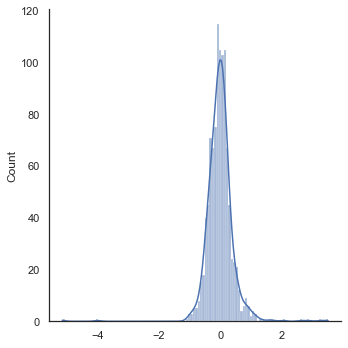

In [434]:
# Creating residual and creating distribution plot 
res = y_train - y_pred_train
sns.displot(res,kde=True)
plt.show()

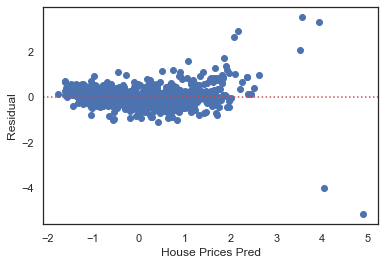

In [435]:
plt.scatter(y_pred_train , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("House Prices Pred")
plt.ylabel("Residual")
plt.show()

- Error distribution is normal and mean is almost 0
- Error terms are not forming any shape and scatter around 0

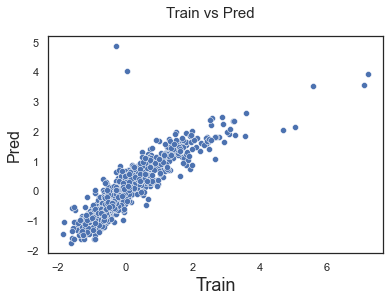

In [436]:
# Graph to check Training data vs predicted data
fig = plt.figure()
sns.scatterplot(y_train,y_pred_train)
fig.suptitle('Train vs Pred', fontsize = 15)             
plt.xlabel('Train', fontsize = 18) 
plt.ylabel('Pred', fontsize = 16)  
plt.show()

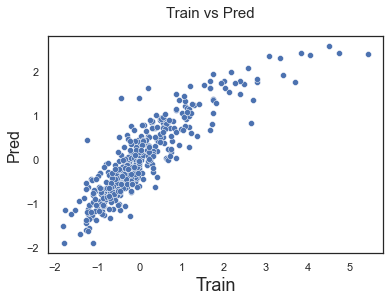

In [437]:
# Graph to check Test data vs predicted data
fig = plt.figure()
sns.scatterplot(y_test,y_pred_test)
fig.suptitle('Train vs Pred', fontsize = 15)             
plt.xlabel('Train', fontsize = 18) 
plt.ylabel('Pred', fontsize = 16)  
plt.show()

Multiple Linear Model looks ok with good Train and test r2 score lets now move to applying regularation 

### Regularization using Ridge and Lasso

In [438]:
## Imprting libraries for ridge and lasso

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Ridge

In [439]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5

model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_sel,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [440]:
# checking best aplha value for model
print(model_cv.best_params_['alpha'])

100


In [441]:
#ridge model 
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_sel,y_train)
print(ridge.intercept_)
print(ridge.coef_)

-0.004900122195682926
[-0.00963297  0.05265482  0.08652698  0.3717236   0.12224689 -0.17080681
 -0.05844639 -0.0492666  -0.05571123 -0.08423394 -0.06924398  0.20433435
 -0.00456824 -0.09266192 -0.03806394 -0.09445179 -0.11900019 -0.11912734
  0.03549181 -0.01197099 -0.01374145  0.09945786  0.03650729]


In [442]:
# Calculating various evaluation matrics
y_pred_train = ridge.predict(X_train_sel)
y_pred_test = ridge.predict(X_test_sel)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7878988544997383
0.7721058740827849
214.58679106591234
101.85342660895782
0.2101731548148015
0.23254206988346535


# Model brief
- Ridge method has selected alpha as 100 from given 28 choices 
- R2 score for both test and train is same. 

### Residual analysis

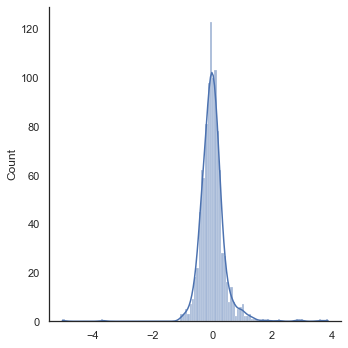

In [443]:
# Creating residual and creating distribution plot 
res = y_train - y_pred_train
sns.displot(res,kde=True)
plt.show()

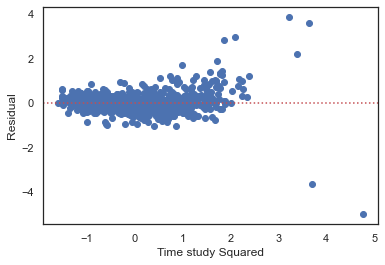

In [444]:
plt.scatter(y_pred_train , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Time study Squared")
plt.ylabel("Residual")
plt.show()

- Error distribution is normal and mean is almost 0
- Error terms are not forming any shape and scatter around 0

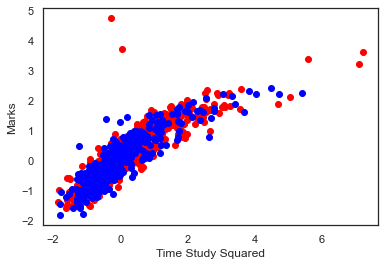

In [445]:
# graph showing test and predicted values
plt.scatter( y_train,y_pred_train, color = 'red')
plt.scatter( y_test,y_pred_test , color = 'blue' )
plt.xlabel("Time Study Squared")
plt.ylabel("Marks")
plt.show()

## Lasso 

In [446]:
# lasso model with same alpha values
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_sel,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [447]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [448]:
# Best alpha value selected is 0.01
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha = alpha)

lasso.fit(X_train_sel,y_train)

Lasso(alpha=0.01)

In [449]:
# Coeff
lasso.coef_

array([-0.00435079,  0.04113937,  0.07177633,  0.42957243,  0.10742361,
       -0.19696271, -0.0564877 , -0.05233033, -0.04575551, -0.08802659,
       -0.06176416,  0.20259567, -0.        , -0.09836282, -0.03203867,
       -0.0903766 , -0.10798521, -0.11996033,  0.01165244, -0.00170093,
       -0.00854172,  0.08636054,  0.02852998])

Lasso has made changes to coeef one coeff is now near to 0

In [450]:
# Calculating various evaluation matrics
y_pred_train = lasso.predict(X_train_sel)
y_pred_test = lasso.predict(X_test_sel)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.789073910925524
0.7767178511288337
213.39796397525225
99.79218144218868
0.20900877960357714
0.2278360306899285


# Model brief
- Ridge method has selected alpha as 0.01 from given 28 choices 
- R2 score for both test and train is same. 

### Residual analysis

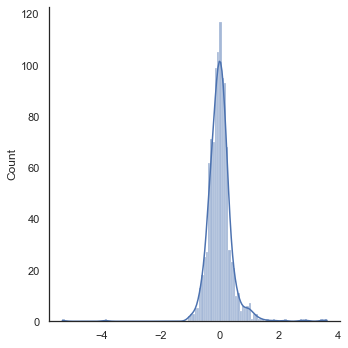

In [451]:
res = y_train - y_pred_train
sns.displot(res,kde=True)
plt.show()

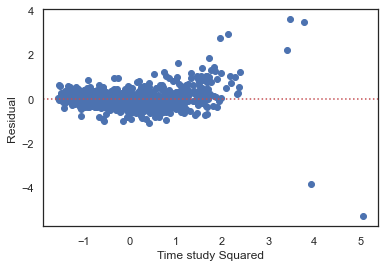

In [452]:
plt.scatter(y_pred_train , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Time study Squared")
plt.ylabel("Residual")
plt.show()

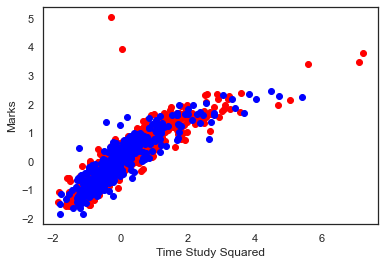

In [453]:
# graph showing test and predicted values
plt.scatter( y_train,y_pred_train, color = 'red')
plt.scatter( y_test,y_pred_test , color = 'blue' )
plt.xlabel("Time Study Squared")
plt.ylabel("Marks")
plt.show()

In [454]:
# Creating summary matrics from all 3 models 
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.792673,0.787899,0.789074
1,R2 Score (Test),0.778880,0.772106,0.776718
2,RSS (Train),209.756287,214.586791,213.397964
3,RSS (Test),98.825873,101.853427,99.792181
4,MSE (Train),0.453257,0.458446,0.457175
5,MSE (Test),0.225630,0.482226,0.477322


- All 3 model has very similar r2 score on test and train 
- MSE is less for all models

In [455]:
# Checking all the coef
betas = pd.DataFrame(index=X_train_sel.columns)
betas.rows = X_train_sel.columns
betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [456]:
pd.set_option('display.max_rows', None)
betas.head(30)

,Linear,Ridge,Lasso
LotFrontage,-0.046849,-0.009633,-0.004351
LotArea,0.050607,0.052655,0.041139
MasVnrArea,0.073453,0.086527,0.071776
GrLivArea,0.455308,0.371724,0.429572
GarageArea,0.102480,0.122247,0.107424
Age,-0.207189,-0.170807,-0.196963
Condition1_Others,-0.064127,-0.058446,-0.056488
BldgType_Duplex,-0.061291,-0.049267,-0.052330
BldgType_Twnhs,-0.073115,-0.055711,-0.045756
HouseStyle_2Story,-0.129461,-0.084234,-0.088027


In [457]:
betas['Linear'].sort_values(ascending=False)

GrLivArea             0.455308
OverallQual_Good      0.201930
GarageArea            0.102480
Fireplaces_1          0.089580
MasVnrArea            0.073453
LotArea               0.050607
MoSold_7              0.042150
HalfBath_1            0.035462
BsmtQual_Fa           0.001676
KitchenQual_Fa       -0.008312
KitchenQual_Gd       -0.028950
BsmtQual_NA          -0.041487
LotFrontage          -0.046849
BldgType_Duplex      -0.061291
Condition1_Others    -0.064127
BldgType_Twnhs       -0.073115
HouseStyle_Others    -0.087107
BsmtExposure_No      -0.096115
BsmtQual_Gd          -0.118706
HouseStyle_2Story    -0.129461
BsmtFinType1_Unf     -0.141763
BsmtFinType1_Other   -0.145149
Age                  -0.207189
Name: Linear, dtype: float64

In [458]:
betas['Ridge'].sort_values(ascending=False)

GrLivArea             0.371724
OverallQual_Good      0.204334
GarageArea            0.122247
Fireplaces_1          0.099458
MasVnrArea            0.086527
LotArea               0.052655
MoSold_7              0.036507
HalfBath_1            0.035492
BsmtQual_Fa          -0.004568
LotFrontage          -0.009633
KitchenQual_Fa       -0.011971
KitchenQual_Gd       -0.013741
BsmtQual_NA          -0.038064
BldgType_Duplex      -0.049267
BldgType_Twnhs       -0.055711
Condition1_Others    -0.058446
HouseStyle_Others    -0.069244
HouseStyle_2Story    -0.084234
BsmtQual_Gd          -0.092662
BsmtExposure_No      -0.094452
BsmtFinType1_Other   -0.119000
BsmtFinType1_Unf     -0.119127
Age                  -0.170807
Name: Ridge, dtype: float64

In [459]:
betas['Lasso'].sort_values(ascending=False)

GrLivArea             0.429572
OverallQual_Good      0.202596
GarageArea            0.107424
Fireplaces_1          0.086361
MasVnrArea            0.071776
LotArea               0.041139
MoSold_7              0.028530
HalfBath_1            0.011652
BsmtQual_Fa          -0.000000
KitchenQual_Fa       -0.001701
LotFrontage          -0.004351
KitchenQual_Gd       -0.008542
BsmtQual_NA          -0.032039
BldgType_Twnhs       -0.045756
BldgType_Duplex      -0.052330
Condition1_Others    -0.056488
HouseStyle_Others    -0.061764
HouseStyle_2Story    -0.088027
BsmtExposure_No      -0.090377
BsmtQual_Gd          -0.098363
BsmtFinType1_Other   -0.107985
BsmtFinType1_Unf     -0.119960
Age                  -0.196963
Name: Lasso, dtype: float64

# Summary 

- Above grade (ground) living area , Overall quality of House , Garage Area positively affects the price of house
- Age of house Basement Finsih type , No basement exposure neagtively affects the price of house

# Subjective questions 

- Impact of doubling the aplha 

In [460]:
# changing alpha from 100 to 200

alpha = 200
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train_sel,y_train)
print(ridge1.intercept_)
print(ridge1.coef_)

-0.0044439585565004165
[ 0.01100777  0.0535916   0.09296908  0.32329841  0.13029498 -0.15105537
 -0.05413531 -0.04284388 -0.04590744 -0.05898409 -0.05964059  0.19875982
 -0.00784075 -0.07417586 -0.03598189 -0.09240675 -0.10303694 -0.1036663
  0.03609677 -0.01420384 -0.00324806  0.10354816  0.03241209]


In [461]:
y_pred_train = ridge1.predict(X_train_sel)
y_pred_test = ridge1.predict(X_test_sel)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7798572444250467
0.762816256305823


In [462]:
# changing alpha from 0.01 to 0.02

alpha = 0.02
lasso1 = Lasso(alpha = alpha)
lasso1.fit(X_train_sel,y_train)
print(lasso.coef_)

[-0.00435079  0.04113937  0.07177633  0.42957243  0.10742361 -0.19696271
 -0.0564877  -0.05233033 -0.04575551 -0.08802659 -0.06176416  0.20259567
 -0.         -0.09836282 -0.03203867 -0.0903766  -0.10798521 -0.11996033
  0.01165244 -0.00170093 -0.00854172  0.08636054  0.02852998]


In [463]:
y_pred_train = lasso1.predict(X_train_sel)
y_pred_test = lasso1.predict(X_test_sel)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7825835329857139
0.7713026467176237


In [464]:
betas['Ridge_double'] = ridge1.coef_
betas['Lasso_double'] = lasso1.coef_

In [465]:
betas.head(30)

,Linear,Ridge,Lasso,Ridge_double,Lasso_double
LotFrontage,-0.046849,-0.009633,-0.004351,0.011008,0.000000
LotArea,0.050607,0.052655,0.041139,0.053592,0.036371
MasVnrArea,0.073453,0.086527,0.071776,0.092969,0.071033
GrLivArea,0.455308,0.371724,0.429572,0.323298,0.415095
GarageArea,0.102480,0.122247,0.107424,0.130295,0.115554
Age,-0.207189,-0.170807,-0.196963,-0.151055,-0.189566
Condition1_Others,-0.064127,-0.058446,-0.056488,-0.054135,-0.048745
BldgType_Duplex,-0.061291,-0.049267,-0.052330,-0.042844,-0.044288
BldgType_Twnhs,-0.073115,-0.055711,-0.045756,-0.045907,-0.033139
HouseStyle_2Story,-0.129461,-0.084234,-0.088027,-0.058984,-0.059658


- Removing top 5 variables

In [466]:
# Lass model coeff with absolote value
betas['Lasso'].abs().sort_values(ascending=False)

GrLivArea             0.429572
OverallQual_Good      0.202596
Age                   0.196963
BsmtFinType1_Unf      0.119960
BsmtFinType1_Other    0.107985
GarageArea            0.107424
BsmtQual_Gd           0.098363
BsmtExposure_No       0.090377
HouseStyle_2Story     0.088027
Fireplaces_1          0.086361
MasVnrArea            0.071776
HouseStyle_Others     0.061764
Condition1_Others     0.056488
BldgType_Duplex       0.052330
BldgType_Twnhs        0.045756
LotArea               0.041139
BsmtQual_NA           0.032039
MoSold_7              0.028530
HalfBath_1            0.011652
KitchenQual_Gd        0.008542
LotFrontage           0.004351
KitchenQual_Fa        0.001701
BsmtQual_Fa           0.000000
Name: Lasso, dtype: float64

In [467]:
# removing GrLivArea,OverallQual_Good,Age,BsmtFinType1_Unf,BsmtFinType1_Other
X_train_sel_new = X_train_sel.drop(['GrLivArea','OverallQual_Good','Age','BsmtFinType1_Unf','BsmtFinType1_Other'],axis = 1)

In [468]:
lasso2 = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_sel_new,y_train)
alpha = model_cv.best_params_['alpha']
lasso2 = Lasso(alpha = alpha)
lasso2.fit(X_train_sel_new,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


Lasso(alpha=0.01)

In [469]:
betas1 = pd.DataFrame(index=X_train_sel_new.columns)
betas1.rows = X_train_sel_new.columns
betas1['Lasso'] = lasso2.coef_
betas1.head(20)

,Lasso
LotFrontage,0.075239
LotArea,0.070707
MasVnrArea,0.183652
GarageArea,0.330825
Condition1_Others,-0.073398
BldgType_Duplex,-0.007854
BldgType_Twnhs,-0.010393
HouseStyle_2Story,0.017465
HouseStyle_Others,-0.063717
BsmtQual_Fa,-0.026623


In [470]:
betas1['Lasso'].abs().sort_values(ascending=False)

GarageArea           0.330825
Fireplaces_1         0.213147
MasVnrArea           0.183652
BsmtExposure_No      0.138614
HalfBath_1           0.110978
KitchenQual_Gd       0.088363
LotFrontage          0.075239
Condition1_Others    0.073398
LotArea              0.070707
HouseStyle_Others    0.063717
BsmtQual_NA          0.034260
BsmtQual_Fa          0.026623
MoSold_7             0.017921
HouseStyle_2Story    0.017465
BldgType_Twnhs       0.010393
KitchenQual_Fa       0.009200
BldgType_Duplex      0.007854
BsmtQual_Gd          0.000000
Name: Lasso, dtype: float64